In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from dython.nominal import associations
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Test 1: Predict Used Car price (Linear – Polynomial Regression )

### Chọn lựa các biến đưa vào mô hình dự đoán

In [405]:
# Add column headers
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\DA11\\Lesson7+8\\imports-85.csv')
df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',\
              'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',\
             'engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg',\
             'price']

In [406]:
df.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710


In [407]:
df.describe(include = 'object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,186
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,40,32,184,167,114,96,120,201,148,158,93,23,20,19,37,4


In [408]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [409]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [410]:
# Change value in 'num-of-doors' and 'num-of-cylinders' into integer
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4,6,5,3,12,2,8])
df['num-of-doors'] = df['num-of-doors'].replace(['two', 'four', '?'],[2,4,4])

In [411]:
# Replace '?' value
df = df.replace(['?'], np.nan)

#Change value in 'num-of-doors' and
# Convert datatype into and float
df = df.astype({'normalized-losses':float,'bore':float,'stroke':float,'horsepower':float,'peak-rpm':float,'price':float})

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    int64  
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    int64  
 16  engine-size        204 non

In [413]:
# Replace null value with mean
df = df.fillna(df.mean())

In [414]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0000
mean,0.823529,122.000000,3.137255,98.806373,174.075000,65.916667,53.749020,2555.602941,4.382353,126.892157,3.329050,3.25830,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.6900
std,1.239035,31.758944,0.992973,5.994144,12.362123,2.146716,2.424901,521.960820,1.083182,41.744569,0.271331,0.31175,3.981000,39.613588,478.071104,6.551513,6.898337,7888.0996
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.07000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.0000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.11000,8.575000,70.000000,4800.000000,19.000000,25.000000,7784.7500
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,119.500000,3.310000,3.29000,9.000000,95.000000,5200.000000,24.000000,30.000000,10470.0000
75%,2.000000,137.000000,4.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,4.000000,142.000000,3.582500,3.41000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.0000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.17000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.0000


In [415]:
df.describe(include = 'object')

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
count,204,204,204,204,204,204,204,204
unique,22,2,2,5,3,2,7,8
top,toyota,gas,std,sedan,fwd,front,ohc,mpfi
freq,32,184,167,96,120,201,148,93


In [416]:
# Check tương quan của các biến numeric với biến price
corr_price = df[df.columns[:]].corr()['price'][:]
corr_price

symboling           -0.083136
normalized-losses    0.133999
num-of-doors         0.042288
wheel-base           0.587607
length               0.683372
width                0.730130
height               0.136123
curb-weight          0.820831
num-of-cylinders     0.688043
engine-size          0.861753
bore                 0.532562
stroke               0.083115
compression-ratio    0.071058
horsepower           0.757943
peak-rpm            -0.100833
city-mpg            -0.668021
highway-mpg         -0.690937
price                1.000000
Name: price, dtype: float64

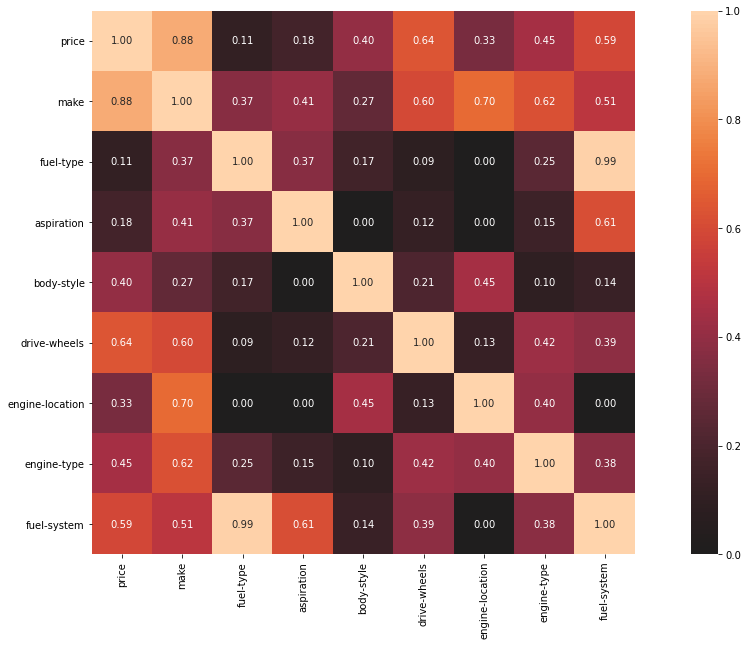

{'corr':                     price      make  fuel-type  aspiration  body-style  \
 price            1.000000  0.878890   0.110297    0.177465    0.402328   
 make             0.878890  1.000000   0.368851    0.408662    0.270851   
 fuel-type        0.110297  0.368851   1.000000    0.373950    0.171311   
 aspiration       0.177465  0.408662   0.373950    1.000000    0.000000   
 body-style       0.402328  0.270851   0.171311    0.000000    1.000000   
 drive-wheels     0.635345  0.601118   0.091359    0.121391    0.205141   
 engine-location  0.331048  0.702147   0.000000    0.000000    0.450763   
 engine-type      0.450303  0.624133   0.248631    0.148958    0.100803   
 fuel-system      0.588126  0.509130   0.985037    0.610275    0.138087   
 
                  drive-wheels  engine-location  engine-type  fuel-system  
 price                0.635345         0.331048     0.450303     0.588126  
 make                 0.601118         0.702147     0.624133     0.509130  
 fuel-type  

In [417]:
# Check tương quan các biến categorical với biến price
associations(df[['price','make','fuel-type','aspiration','body-style','drive-wheels','engine-location',\
                 'engine-type','fuel-system']],figsize=(20,10))

In [418]:
# Chọn các biến có mối tương quan với biến 'price' >= 0.5 và <= -0.5
car_price = df[['wheel-base','length','width','curb-weight','num-of-cylinders','engine-size','bore','horsepower',\
              'city-mpg','highway-mpg','make','drive-wheels','fuel-system','price']]
car_price.head(6)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,make,drive-wheels,fuel-system,price
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,alfa-romero,rwd,mpfi,16500.0
1,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,alfa-romero,rwd,mpfi,16500.0
2,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,audi,fwd,mpfi,13950.0
3,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,audi,4wd,mpfi,17450.0
4,99.8,177.3,66.3,2507,5,136,3.19,110.0,19,25,audi,fwd,mpfi,15250.0
5,105.8,192.7,71.4,2844,5,136,3.19,110.0,19,25,audi,fwd,mpfi,17710.0


### Chuẩn hóa dữ liệu

In [419]:
car_price['make'] = car_price['make'].replace(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',\
                                             'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan',\
                                             'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',\
                                             'volkswagen', 'volvo'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
car_price['drive-wheels'] = car_price['drive-wheels'].replace(['rwd', 'fwd', '4wd'],[1,2,3])
car_price['fuel-system'] = car_price['fuel-system'].replace(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],\
                                                         [1,2,3,4,5,6,7,8])

car_price.head(6)

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,city-mpg,highway-mpg,make,drive-wheels,fuel-system,price
0,88.6,168.8,64.1,2548,4,130,3.47,111.0,21,27,1,1,1,16500.0
1,94.5,171.2,65.5,2823,6,152,2.68,154.0,19,26,1,1,1,16500.0
2,99.8,176.6,66.2,2337,4,109,3.19,102.0,24,30,2,2,1,13950.0
3,99.4,176.6,66.4,2824,5,136,3.19,115.0,18,22,2,3,1,17450.0
4,99.8,177.3,66.3,2507,5,136,3.19,110.0,19,25,2,2,1,15250.0
5,105.8,192.7,71.4,2844,5,136,3.19,110.0,19,25,2,2,1,17710.0


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

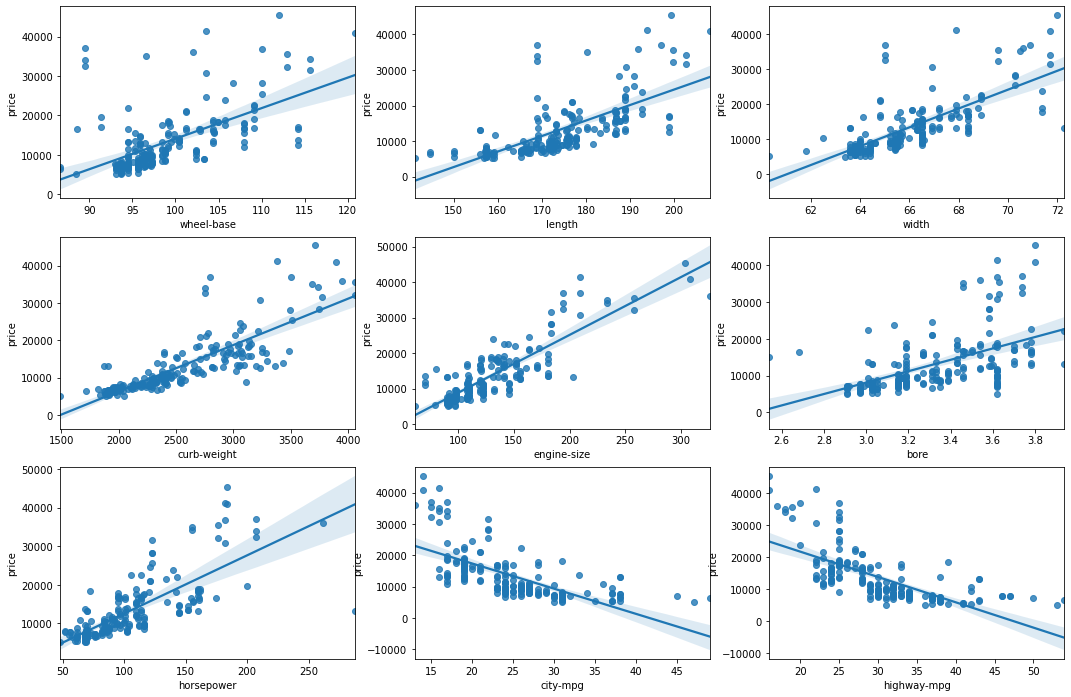

In [420]:
# Check outliers các biến
fig, axes = plt.subplots(3, 3, figsize=(18,12))

sns.regplot(ax=axes[0,0], x = 'wheel-base', y = 'price', data = car_price)
sns.regplot(ax=axes[0,1], x = 'length', y = 'price', data = car_price)
sns.regplot(ax=axes[0,2], x = 'width', y = 'price', data = car_price)
sns.regplot(ax=axes[1,0], x = 'curb-weight', y = 'price', data = car_price)
sns.regplot(ax=axes[1,1], x = 'engine-size', y = 'price', data = car_price)
sns.regplot(ax=axes[1,2], x = 'bore', y = 'price', data = car_price)
sns.regplot(ax=axes[2,0], x = 'horsepower', y = 'price', data = car_price)
sns.regplot(ax=axes[2,1], x = 'city-mpg', y = 'price', data = car_price)
sns.regplot(ax=axes[2,2], x = 'highway-mpg', y = 'price', data = car_price)

In [421]:
car_price['horsepower'].loc[(car_price['horsepower'] > 250) & (car_price['price'] < 15000)] = car_price['horsepower'].mean()
car_price['wheel-base'].loc[(car_price['wheel-base'] < 95) & (car_price['price'] > 15000)] = car_price['wheel-base'].mean()

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

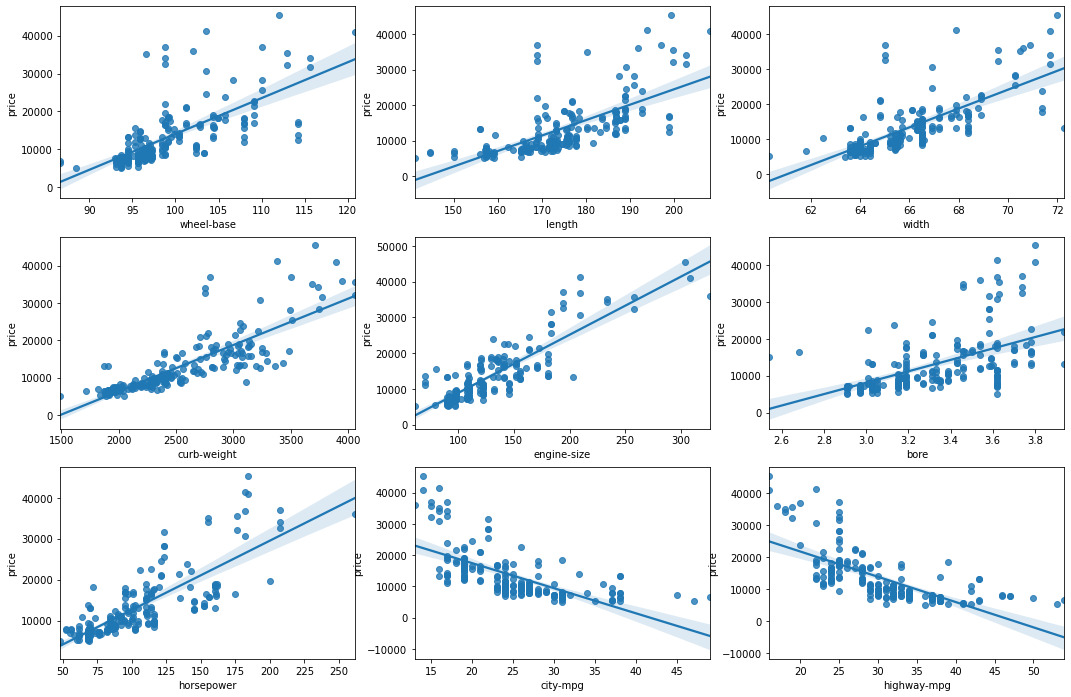

In [422]:
fig, axes = plt.subplots(3, 3, figsize=(18,12))

sns.regplot(ax=axes[0,0], x = 'wheel-base', y = 'price', data = car_price)
sns.regplot(ax=axes[0,1], x = 'length', y = 'price', data = car_price)
sns.regplot(ax=axes[0,2], x = 'width', y = 'price', data = car_price)
sns.regplot(ax=axes[1,0], x = 'curb-weight', y = 'price', data = car_price)
sns.regplot(ax=axes[1,1], x = 'engine-size', y = 'price', data = car_price)
sns.regplot(ax=axes[1,2], x = 'bore', y = 'price', data = car_price)
sns.regplot(ax=axes[2,0], x = 'horsepower', y = 'price', data = car_price)
sns.regplot(ax=axes[2,1], x = 'city-mpg', y = 'price', data = car_price)
sns.regplot(ax=axes[2,2], x = 'highway-mpg', y = 'price', data = car_price)

### Linear Regression

In [423]:
feature_cols = ['wheel-base','length','width','curb-weight','num-of-cylinders','engine-size','bore','horsepower',\
              'city-mpg','highway-mpg','make','drive-wheels','fuel-system']

In [424]:
price_x = car_price[feature_cols]
scaler = preprocessing.StandardScaler().fit(price_x)

In [425]:
price_x_scaled = scaler.transform(price_x)
price_x_scaled

array([[-0.05257927, -0.42775636, -0.84833554, ..., -1.97145189,
        -1.22071325, -0.68081293],
       [-0.05257927, -0.23313735, -0.19457237, ..., -1.97145189,
        -1.22071325, -0.68081293],
       [ 0.12001423,  0.20475541,  0.13230921, ..., -1.81058142,
         0.58381938, -0.68081293],
       ...,
       [ 1.73542807,  1.1940687 ,  1.39313818, ...,  1.40682807,
        -1.22071325, -0.68081293],
       [ 1.73542807,  1.1940687 ,  1.39313818, ...,  1.40682807,
        -1.22071325,  2.06940168],
       [ 1.73542807,  1.1940687 ,  1.39313818, ...,  1.40682807,
        -1.22071325, -0.68081293]])

In [426]:
price_y = np.array(car_price['price']).reshape(-1,1)

In [427]:
from sklearn.model_selection import train_test_split 
price_x_train, price_x_test, price_y_train, price_y_test = train_test_split(price_x_scaled, price_y, test_size=0.2, random_state=0)

In [428]:
from sklearn.linear_model import LinearRegression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(price_x_train,price_y_train)

LinearRegression()

In [429]:
price_y_predict =  lin_reg.predict(price_x_test)
price_y_predict

array([[ 8741.54610468],
       [12039.66741654],
       [ 7835.89485788],
       [10756.94491904],
       [21265.26944623],
       [ 6672.64953252],
       [17624.05751471],
       [17088.0258568 ],
       [19304.54676721],
       [ 3632.28828854],
       [11570.44814922],
       [ 9117.02112877],
       [14355.42111692],
       [ 5699.90880676],
       [ 5948.09308129],
       [19522.61216708],
       [11012.20297831],
       [11460.01911995],
       [ 6884.01083897],
       [24146.02909841],
       [ 8213.67910223],
       [ 8615.1557915 ],
       [11573.5796958 ],
       [15306.89320364],
       [11881.69664698],
       [ 8124.8566496 ],
       [ 6872.28142767],
       [ 8001.85641882],
       [ 5703.66666266],
       [ 6720.22186993],
       [17179.91582664],
       [11565.22890492],
       [30410.07343977],
       [21443.91410938],
       [10209.49816509],
       [ 9590.16854351],
       [23009.35499244],
       [ 6914.25771681],
       [15107.37688759],
       [ 6315.63614027],


In [430]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(price_y_test, price_y_predict))
# The coefficient of determination
print('Coefficient of determination: %.2f'
      % r2_score(price_y_test, price_y_predict))

Coefficients: 
 [[ 2267.03170068    57.20120357     5.11680149   108.70223076
   -329.29279985  3001.31867372   -56.4323324   3044.83362806
    873.86364568   -24.49645816 -1108.91271782  -517.9003402
    168.89758959]]
Mean squared error: 14084526.18
Coefficient of determination: 0.77


### Polynominal Regression

In [457]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
price_x_poly = poly_reg.fit_transform(price_x_scaled)

price_x_poly_train, price_x_poly_test, price_y_poly_train, price_y_poly_test = train_test_split(price_x_poly, price_y, test_size=0.2, random_state=0)

In [458]:
pol_reg = LinearRegression()
pol_reg.fit(price_x_poly_train, price_y_poly_train)

LinearRegression()

In [459]:
price_y_poly_predict = pol_reg.predict(price_x_poly_test)
price_y_poly_predict

array([[11064.],
       [18428.],
       [ 4996.],
       [ 7476.],
       [18376.],
       [ 5896.],
       [22800.],
       [26428.],
       [22460.],
       [32208.],
       [ 8716.],
       [10080.],
       [ 8632.],
       [ 8820.],
       [ 7688.],
       [28612.],
       [14044.],
       [10712.],
       [ 6268.],
       [26008.],
       [ 8636.],
       [ 6652.],
       [ 8956.],
       [17584.],
       [10124.],
       [ 5580.],
       [12720.],
       [ 7724.],
       [ 8800.],
       [ 7300.],
       [11352.],
       [ 8300.],
       [44164.],
       [31828.],
       [ 7260.],
       [ 6804.],
       [  356.],
       [ 6328.],
       [10236.],
       [ 6416.],
       [32992.]])

In [460]:
# The coefficients
print('Coefficients: \n', pol_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(price_y_poly_test, price_y_poly_predict))
# The coefficient of determination
print('Coefficient of determination: %.2f'
      % r2_score(price_y_poly_test, price_y_poly_predict))

Coefficients: 
 [[ 2.01004686e+16 -1.27661016e+03  2.69909019e+03  8.97339433e+02
   1.33479436e+03 -2.46443598e+03  3.01544918e+03 -1.47324746e+03
   1.69166724e+03  2.50417764e+03 -1.07259445e+03 -1.30965951e+03
  -8.43206016e+01 -2.25310319e+03  3.19158650e+03 -4.71109414e+03
   3.57187814e+03 -4.34939234e+03  1.36500781e+04 -1.46944533e+04
   9.19410565e+03  4.58309114e+03  4.96435753e+03 -1.82221022e+03
  -2.12600566e+03  4.35826884e+03 -4.80376286e+02  1.76366546e+03
  -2.91171926e+03  1.27666412e+04 -1.70878453e+03 -4.63838643e+03
  -4.81907939e+03  1.08751353e+03  4.59157469e+03 -2.86506688e+03
   7.47169204e+02  2.77483491e+02  1.65729449e+03  5.60860918e+02
  -6.46916193e+03 -4.04193151e+03  6.35438399e+03 -8.80831583e+02
  -1.26686250e+03  2.24768715e+03 -3.17096755e+03 -1.75167173e+03
  -2.99980437e+03 -1.45741480e+03 -5.88124263e+03 -1.37496113e+04
   1.79400893e+04 -2.65009296e+03 -3.55396388e+03 -1.29880902e+04
   4.99161622e+03 -1.51574739e+03 -3.72557869e+03  3.3660699

#  Predict Loan Pay Off ( Logistic Regression )

In [475]:
loan = pd.read_csv('C:\\Users\\Admin\\Desktop\\DA11\\Lesson7+8\\loan_train.csv')
loan.head(6)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male


In [476]:
# Bỏ một số cột thừa và đổi tên columns
loan.drop(columns = ['Unnamed: 0','Unnamed: 0.1'], inplace = True)
loan = loan.rename(columns={'Principal':'principal', 'Gender': 'gender'})
loan.head(6)

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male


In [485]:
# Thêm cột effective_time là khoảng thời gian giữa effective_date và due_date
loan['effective_date'] = pd.to_datetime(loan['effective_date'])
loan['due_date'] = pd.to_datetime(loan['due_date'])
loan['effective_time'] = (loan['due_date'] - loan['effective_date']).dt.days
loan.drop(columns = ['effective_date','due_date'], inplace = True)
loan.head(6)

,loan_status,principal,terms,age,education,gender,effective_time
0,PAIDOFF,1000,30,45,High School or Below,male,29
1,PAIDOFF,1000,30,33,Bechalor,female,29
2,PAIDOFF,1000,15,27,college,male,14
3,PAIDOFF,1000,30,28,college,female,29
4,PAIDOFF,1000,30,29,college,male,29
5,PAIDOFF,1000,30,36,college,male,29


In [490]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   age             346 non-null    int64 
 4   education       346 non-null    object
 5   gender          346 non-null    object
 6   effective_time  346 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 19.0+ KB


In [491]:
loan.describe()

,principal,terms,age,effective_time
count,346.000000,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306,23.361272
std,109.425530,7.991006,6.039418,10.602958
min,300.000000,7.000000,18.000000,6.000000
25%,900.000000,15.000000,27.000000,14.000000
50%,1000.000000,30.000000,30.000000,29.000000
75%,1000.000000,30.000000,35.000000,29.000000
max,1000.000000,30.000000,51.000000,59.000000


<AxesSubplot:xlabel='loan_status', ylabel='count'>

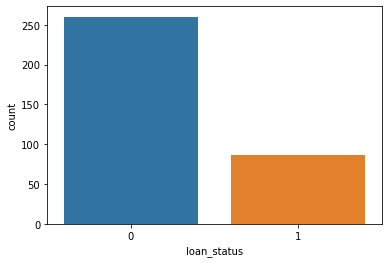

In [512]:
sns.countplot(loan['loan_status'])

In [489]:
loan['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [497]:
loan['education'] = loan['education'].replace(['High School or Below', 'Bechalor', 'college', 'Master or Above'],[1,2,3,4])
loan['gender'] = loan['gender'].replace(['male', 'female'],[0,1])
loan['loan_status'] = loan['loan_status'].replace(['PAIDOFF', 'COLLECTION'],[0,1])
loan.head(6)

,loan_status,principal,terms,age,education,gender,effective_time
0,0,1000,30,45,1,0,29
1,0,1000,30,33,2,1,29
2,0,1000,15,27,3,0,14
3,0,1000,30,28,3,1,29
4,0,1000,30,29,3,0,29
5,0,1000,30,36,3,0,29


In [498]:
features = ['principal', 'terms', 'age', 'education', 'gender', 'effective_time']
loan_x = loan[features]

In [499]:
scaler_x = preprocessing.StandardScaler().fit(loan_x)
scaler_x

StandardScaler()

In [500]:
loan_x_scaled = scaler_x.transform(loan_x)
loan_x_scaled

array([[ 0.51578458,  0.92071769,  2.33152555, -1.06604119, -0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769,  0.34170148, -0.00612667,  2.37778177,
         0.53257725],
       [ 0.51578458, -0.95911111, -0.65321055,  1.05378785, -0.42056004,
        -0.88417105],
       ...,
       [-1.31458942, -0.95911111,  1.33661351,  1.05378785, -0.42056004,
        -0.88417105],
       [ 0.51578458,  0.92071769, -0.48739188,  1.05378785, -0.42056004,
         3.36607386],
       [ 0.51578458,  0.92071769, -0.81902922,  1.05378785, -0.42056004,
         0.53257725]])

In [501]:
loan_y = loan['loan_status']

In [502]:
loan_x_train, loan_x_test, loan_y_train, loan_y_test = train_test_split(loan_x_scaled, loan_y ,test_size=0.25,random_state=0)

In [503]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [504]:
lr = logreg.fit(loan_x_train, loan_y_train)

In [505]:
loan_y_pred = logreg.predict(loan_x_test)
print(loan_y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [506]:
lr.score(loan_x_test,loan_y_test)

0.8275862068965517

In [507]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(loan_y_test, loan_y_pred)
cnf_matrix

array([[70,  3],
       [12,  2]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

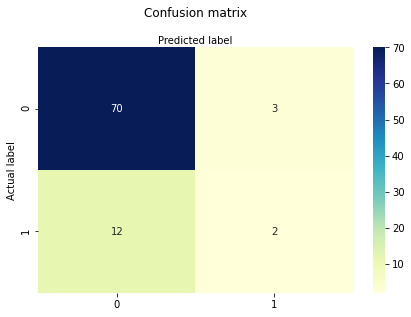

In [508]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Test 4 : Wine Classification

In [510]:
wine = pd.read_csv('C:\\Users\\Admin\\Desktop\\DA11\\Lesson7+8\\wine.csv')
wine.columns = ['Type','Alcohol','Malic acid','Ash', 'Alcalinity of ash','Magnesium','Total Phenols','Flavanoids',\
                'Nonflavanoids phenols','Proanthocyanins','Color intensify','Hue','OD280/OD315 of diluted wines','Proline']
wine.head(6)

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [511]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total Phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoids phenols         177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensify               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [513]:
wine.describe()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,Color intensify,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:xlabel='Type', ylabel='count'>

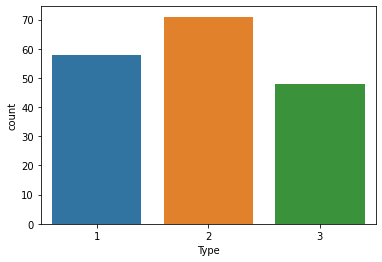

In [523]:
sns.countplot(wine['Type'])

In [516]:
wine_y = wine['Type'].values
wine_x = wine.iloc[:,1:].values

array([[1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [517]:
wine_x_scaled = preprocessing.StandardScaler().fit(wine_x).transform(wine_x)
wine_x_scaled

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [518]:
wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(wine_x_scaled, wine_y, test_size=0.3, random_state=0)

### Sử dụng Naive Bayes

In [520]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
wine_y_pred = gnb.fit(wine_x_train, wine_y_train).predict(wine_x_test)
wine_y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

In [521]:
print("Number of mislabeled points out of a total %d points : %d"% (wine_x_test.shape[0], (wine_y_test != wine_y_pred).sum()))

Number of mislabeled points out of a total 54 points : 1


In [522]:
from sklearn.metrics import accuracy_score
accuracy_score(wine_y_test, wine_y_pred)

0.9814814814814815

### Sử dụng Logistic Regression

In [524]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
logr = log_reg.fit(wine_x_train, wine_y_train)

In [525]:
wine_y_pred_log = log_reg.predict(wine_x_test)
print(wine_y_pred_log)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 3 1 1 1 3
 2 2 3 1 1 2 2 2 1 3 2 3 1 3 3 1 3]


In [526]:
print("Number of mislabeled points out of a total %d points : %d"% (wine_x_test.shape[0], (wine_y_test != wine_y_pred_log).sum()))

Number of mislabeled points out of a total 54 points : 0


In [527]:
accuracy_score(wine_y_test, wine_y_pred_log)

1.0